In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


# **Understanding the dataset**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Csv  files/heart.csv")

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**ANALYSING THE TARGET VARIABLE -WHICH IS DEPENDENT VARIABLE(want to predict based on the predictors.)**

In [ ]:
dataset["target"].describe()
dataset["target"].unique()

array([1, 0])

**SO IT IS A Classification problem, with the target variable having values '0' and '1'**

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


**TRAIN AND TEST SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


# **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


# **SVM**

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


# **K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred_dt=dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2) # Change variable name to score_dt for clarity

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %") # Update print statement

The accuracy score achieved using Decision Tree is: 77.05 %


# **Random forest**
*This approach ensures that the model is trained and evaluated multiple times with different random states to find a more robust estimation of its performance..*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


# **FINAL SCORE**

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]


for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 77.05 %
The accuracy score achieved using Random Forest is: 90.16 %


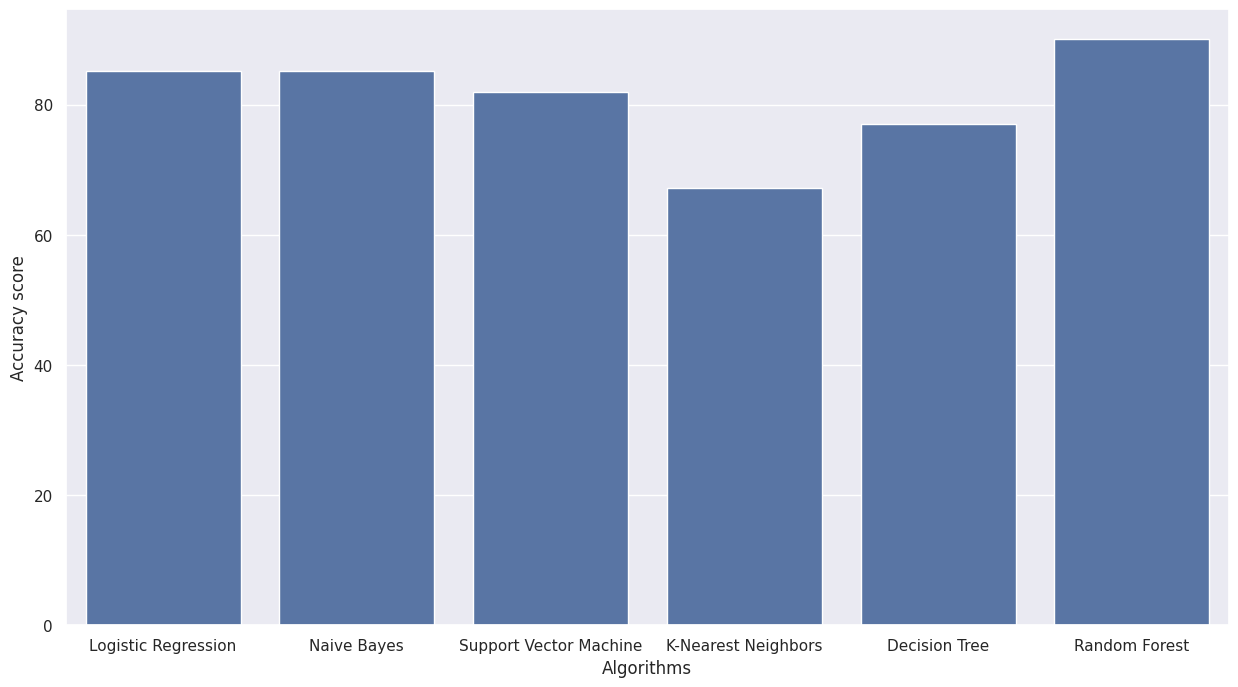

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'algorithms' and 'scores' are already defined

data = {'Algorithm': algorithms, 'Accuracy Score': scores}
df = pd.DataFrame(data)  # Create a DataFrame

sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x='Algorithm', y='Accuracy Score', data=df)  # Use the DataFrame
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Example user input, replace with actual data collection method
# Make sure these features match the ones used during training (X_train)
user_data = {
    'age': 35,
    'sex': 1,
    'cp': 0,
    'trestbps': 120,
    'chol': 230,
    'fbs': 0,
    'restecg': 1,
    'thalach': 170,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 0,
    'thal': 2
}

# Convert user input into a DataFrame for prediction
user_df = pd.DataFrame([user_data], columns=X_train.columns)

rf = RandomForestClassifier(random_state=best_x)

rf.fit(X_train, Y_train)

# Make prediction for user input
user_prediction = rf.predict(user_df)

# Output the prediction
if user_prediction[0] == 1:
    print("Based on the input data, it is predicted that you have the disease.")
else:
    print("Based on the input data, it is predicted that you do not have the disease.")

Based on the input data, it is predicted that you have the disease.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


print("Please answer the following questions by typing 'yes' or 'no'.")
questions = [
    "Do you experience chest pain or discomfort?",
    "Do you feel unusually tired or fatigued?",
    "Have you noticed shortness of breath during regular activities?"
]


user_answers = []
for question in questions:
    while True:
        answer = input(f"{question} (yes/no): ").strip().lower()
        if answer in ['yes', 'no']:
            user_answers.append(1 if answer == 'yes' else 0)
            break
        else:
            print("Invalid input. Please answer with 'yes' or 'no'.")
print("User answers:", user_answers)



user_data = {
    'chest_pain': user_answers[0],
    'fatigue': user_answers[1],
    'shortness_of_breath': user_answers[2]
    # Add more features as per your model requirements
}

# Create a DataFrame with all columns
user_df = pd.DataFrame(columns=X_train.columns)

feature_mapping = {
    'chest_pain': 'cp',
    'fatigue': 'thal',
    'shortness_of_breath': 'exang'
}
for user_feature, model_feature in feature_mapping.items():
    if user_feature in user_data:
        user_df[model_feature] = [user_data[user_feature]]

# Fill any remaining columns with a default value (e.g., 0)
user_df = user_df.fillna(0)

# Assuming you have already trained and chosen the best model (RandomForestClassifier)
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)

# Make prediction for user input
user_prediction = rf.predict(user_df)

# Output the prediction
if user_prediction[0] == 1:
    print("Based on the input data, it is predicted that you have symptoms of heart disease.")
else:
    print("Based on the input data, it is predicted that you do not have symptoms of heart disease.")

Please answer the following questions by typing 'yes' or 'no'.
